In [0]:
!pip install transformers --quiet

In [24]:
import json
from transformers import pipeline
import numpy as np
import pprint
import pandas as pd

nlp_features = pipeline('feature-extraction')

In [25]:
amazon_df = pd.read_csv("./imdb_50k/amazon_dev.tsv", sep = "\t").head(1000)

amazon_features = []

total_count = 1000
print_step = 100
count = 0
for index, row in amazon_df.iterrows():
    review = row["Review"]
    input = nlp_features.tokenizer.cls_token + review 
    count += 1
    if(count > total_count):
      break
    if(count %print_step ==0):
        print("Processed count:", count)
    try:
        output = nlp_features(input)
        output_array = np.array(output)
        feature = list(output_array[0][0])
        amazon_features.append(feature)

    except Exception as e:
        pass
        


Processed count: 100
Processed count: 200
Processed count: 300
Processed count: 400
Processed count: 500
Processed count: 600
Processed count: 700
Processed count: 800
Processed count: 900
Processed count: 1000


In [26]:
imdb_df = pd.read_csv("./imdb_50k/imdb_dev.tsv", sep = "\t").head(1000)

imdb_features = []
count = 0
for index, row in imdb_df.iterrows():
    review = row["text"]
    input = nlp_features.tokenizer.cls_token + review 
    count += 1
    if(count > total_count):
      break
    if(count %print_step ==0):
        print("Processed count:",count)
    try:
        output = nlp_features(input)
        output_array = np.array(output)
        feature = list(output_array[0][0])
        imdb_features.append(feature)

    except Exception as e:
        pass
        



Processed count: 100
Processed count: 200
Processed count: 300
Processed count: 400
Processed count: 500
Processed count: 600
Processed count: 700
Processed count: 800
Processed count: 900
Processed count: 1000


In [27]:
print(len(amazon_features), len(imdb_features))


961 855


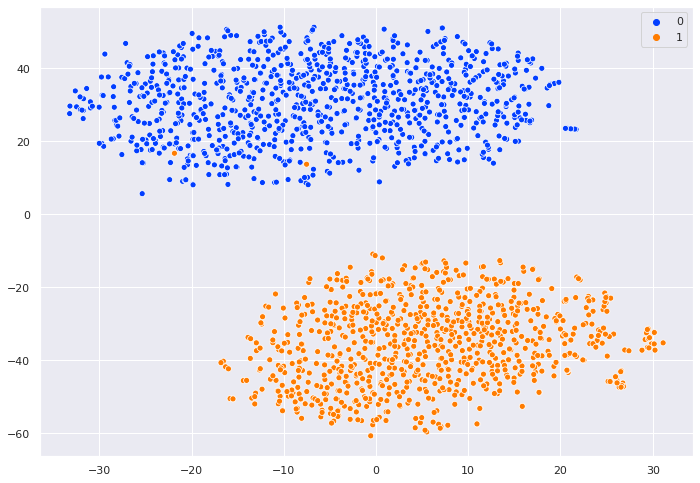

In [28]:
from sklearn.manifold import TSNE
total_features = amazon_features + imdb_features
X_embedded = TSNE(n_components=2).fit_transform(total_features)
X_embedded.shape
y = [0 for i in np.arange(len(amazon_features))] + [1 for i in np.arange(len(imdb_features))]

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)